# Project: Retinal vessel segmentation

The segmentation of retinal blood vessels from eye fundus images is of great significance for early diagnosis of eye-related diseases such as diabetes and hypertension.

The goal of this project is to read an eye fundus image like the following:

![](https://dlsi.ua.es/~pertusa/tvainput21.png)

And extract the blood vessels as can be seen in the corresponding ground-truth sample:

![](https://dlsi.ua.es/~pertusa/tvagt21.png)

All the images for this project are extracted from the [Drive](https://drive.grand-challenge.org) dataset.

For this task you can use any computer vision technique **except by deep neural networks**, that are not allowed in this project.

## Implementation

To begin with the project, open this notebook in google colab. Then, download from moodle the folder with all the images and upload it to google drive.

Then, import the following libraries (you can add more):

In [2]:
import os
from google.colab import drive
import cv2 as cv

drive.mount('/content/drive')

%matplotlib inline
from matplotlib import pyplot as plt

db_path =  "/content/drive/MyDrive/TVAProject"

ModuleNotFoundError: No module named 'google.colab'

Now you should edit the following function to segment the image and return the segmentation. This is only a simple (basic) skeleton that obviously is not performing well. **The goal of your project is basically to complete this function**. You can read the attached papers in Moodle to get ideas for accurate segmentation.

In [ ]:
def vessel_segmentation(input_image):

    img = cv.imread(input_image, cv.IMREAD_GRAYSCALE)

    # TODO: Here it goes your segmentation algorithm. A basic threholding is shown as example.
    th, segmented_image = cv.threshold(img, 128, 255, cv.THRESH_BINARY)

    return segmented_image

Your project will be evaluated with the Intersection over Union (IoU) metric, commonly used in segmentation tasks. This is the function to read a ground truth image and return the IoU considering your segmented image.

In [ ]:
def single_IoU(img_name):

    # Apply segmentation
    input_img = os.path.join(db_path, 'input', img_name)
    obtained = vessel_segmentation(input_img)

    # Path of the target (ground truth) image
    path_target = os.path.join(db_path, 'gt', img_name)
    solution = cv.imread(path_target, cv.IMREAD_GRAYSCALE)

    # Show obtained results
    plt.imshow(obtained, cmap=plt.get_cmap('gray'))
    plt.show()

    # IoU calculation
    intersectionAB = cv.countNonZero(obtained & solution)
    unionAB = cv.countNonZero(obtained | solution)
    score = intersectionAB / unionAB
    print("Image {} - IoU={}".format(path_input, score))

    return score

This is the evaluation method that reads all the images from the input folder and gets the mean IoU for all of them. This is the score of your project, the higher the better.

['22.png', '23.png', '27.png', '24.png', '26.png', '28.png', '25.png', '34.png', '30.png', '31.png', '29.png', '32.png', '33.png', '39.png', '40.png', '36.png', '38.png', '35.png', '37.png', '21.png']


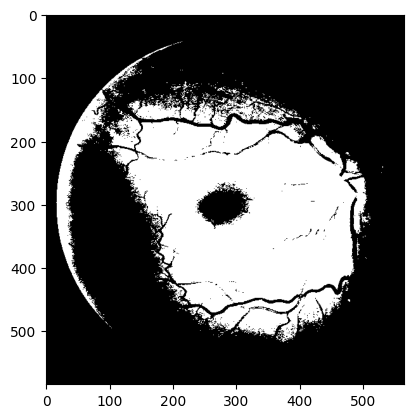

Image /content/drive/MyDrive/TVAProject/input - IoU=0.08094422819117149


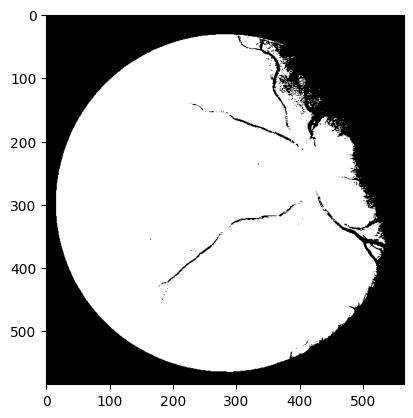

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07840395732186507


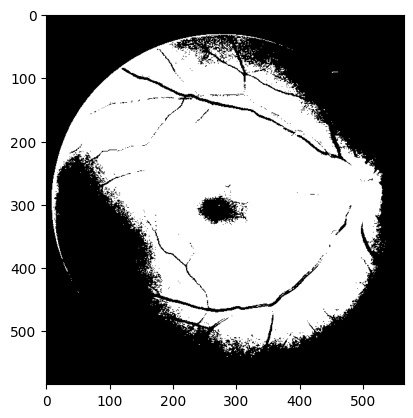

Image /content/drive/MyDrive/TVAProject/input - IoU=0.10673367199718724


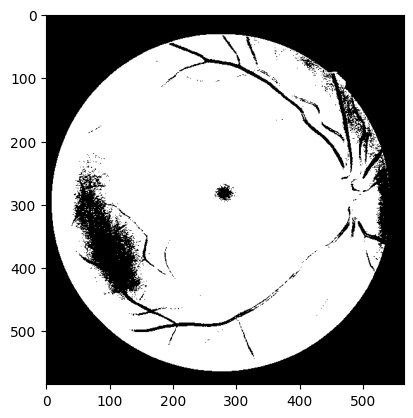

Image /content/drive/MyDrive/TVAProject/input - IoU=0.13946559470323955


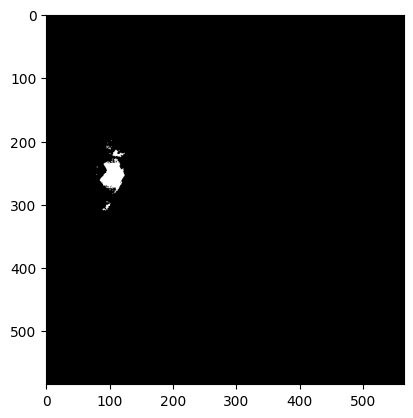

Image /content/drive/MyDrive/TVAProject/input - IoU=0.0015228075032878798


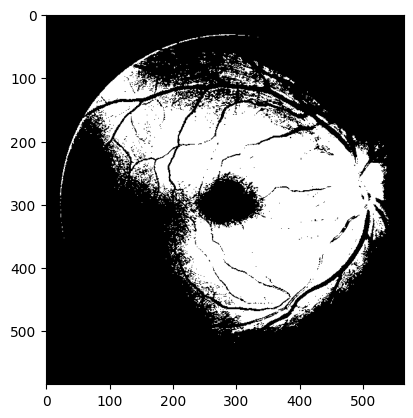

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07165602468280288


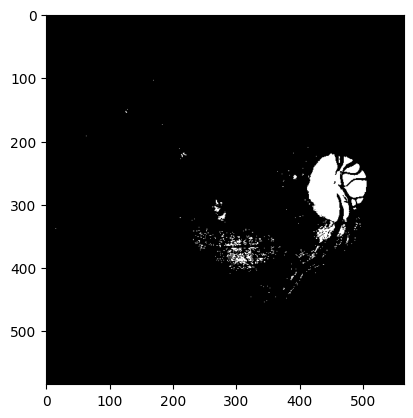

Image /content/drive/MyDrive/TVAProject/input - IoU=0.03559904236494223


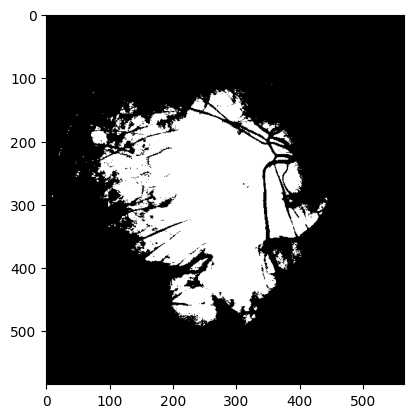

Image /content/drive/MyDrive/TVAProject/input - IoU=0.11746449414701617


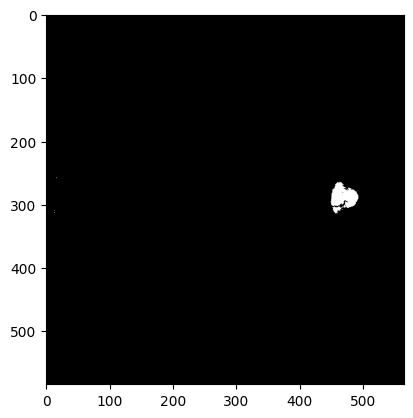

Image /content/drive/MyDrive/TVAProject/input - IoU=0.0009951348960636887


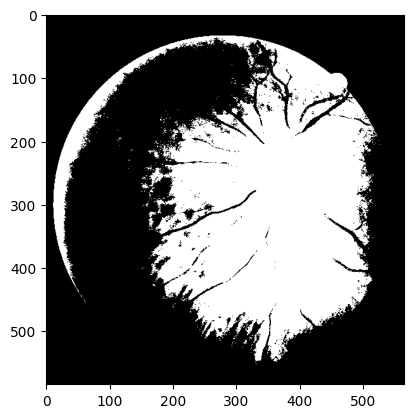

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07404341427520235


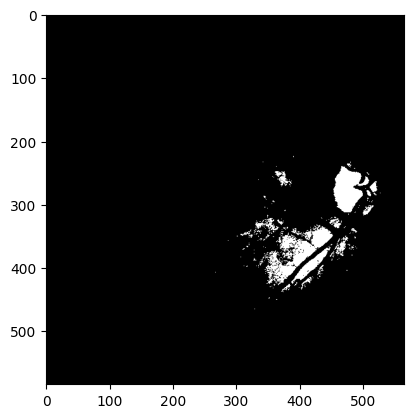

Image /content/drive/MyDrive/TVAProject/input - IoU=0.015919038724246565


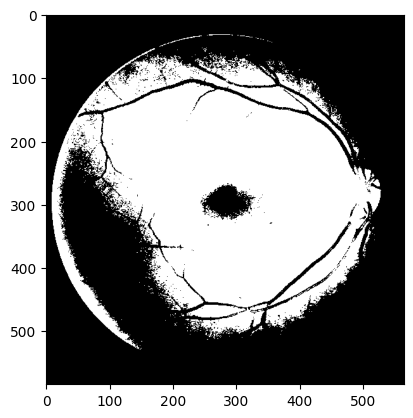

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07612737959013835


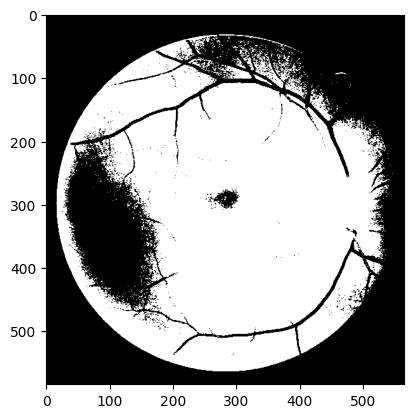

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07580173353626286


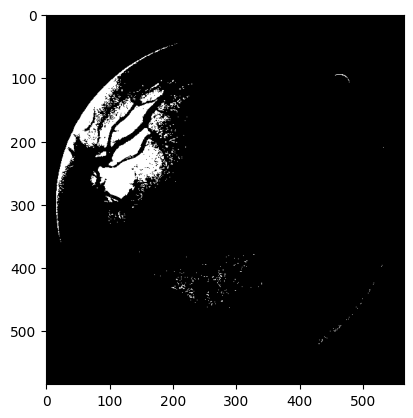

Image /content/drive/MyDrive/TVAProject/input - IoU=0.016453556206395693


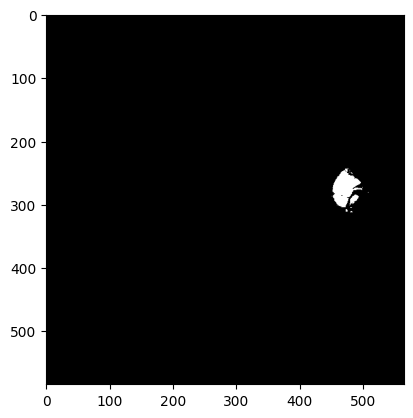

Image /content/drive/MyDrive/TVAProject/input - IoU=0.005879470847623714


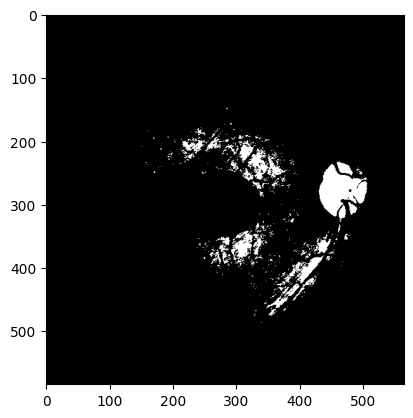

Image /content/drive/MyDrive/TVAProject/input - IoU=0.02566084734480019


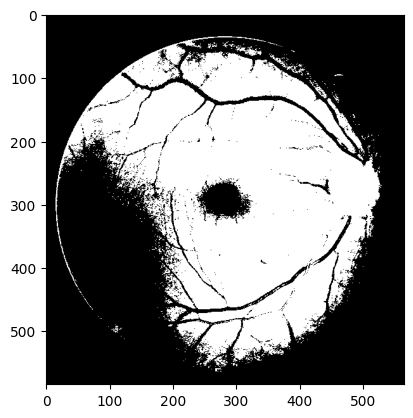

Image /content/drive/MyDrive/TVAProject/input - IoU=0.07978018300922768


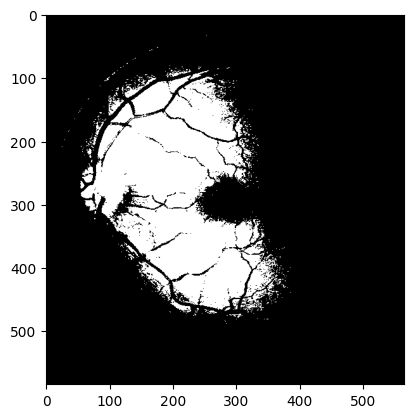

Image /content/drive/MyDrive/TVAProject/input - IoU=0.053522123086050706


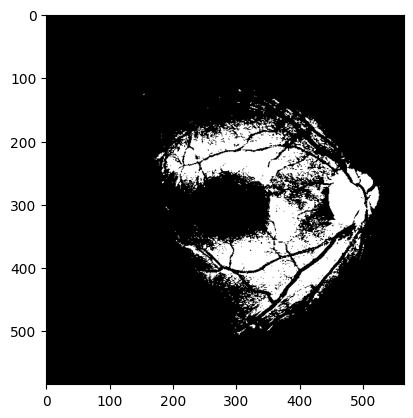

Image /content/drive/MyDrive/TVAProject/input - IoU=0.035565260308391786


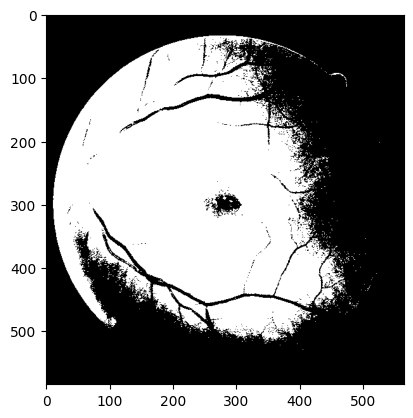

Image /content/drive/MyDrive/TVAProject/input - IoU=0.08153222442381895
------------------------------------
Mean IoU=0.058653509357986765


In [ ]:
meanIoU=0

path_input = os.path.join(db_path, 'input')

# List images in input folder
imgs = [f for f in os.listdir(path_input) if f.endswith('.png')]
print(imgs)

# Calculate IoU for each image and get meanIoU
for img in imgs:
    meanIoU += single_IoU(img)

# Average
meanIoU /= len(imgs)
print("------------------------------------")
print("Mean IoU={}".format(meanIoU))
